In [ ]:
!pip install kaggle

In [ ]:
import json
import os
from pathlib import Path

# your api key
api_key = {
    'username': "satrianugrahasaputra",
    'key': "126d19094ea0191233e8313d5bc1eab6"
}

# Uses pathlib Path to define the path to .kaggle directory in user's home
kaggle_path = Path.home() / '.kaggle'
os.makedirs(kaggle_path, exist_ok=True)

# Opens file and dumps python dict to json object
with open(kaggle_path / 'kaggle.json', 'w') as handle:
    json.dump(api_key, handle)

# Modify permissions after creating the file
os.chmod(kaggle_path / 'kaggle.json', 0o600)


In [ ]:
!kaggle datasets download fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 70.6MB/s]


In [ ]:
!unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
# Memuat dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Menampilkan beberapa baris pertama dari dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Setelah memuat dataset, maka akan terlihat beberapa baris pertama untuk memahami struktur data. Kemudian,  bisa dilanjutkan dengan melakukan eksplorasi data dan analisis lebih lanjut.

Setelah memuat dataset dan melihat beberapa baris pertama, langkah berikutnya adalah melakukan eksplorasi data untuk memahami karakteristik dan distribusi variabel-variabel dalam dataset, termasuk mengecek tipe data, statistik deskriptif, dan visualisasi.

In [ ]:
# Informasi tentang tipe data dan jumlah nilai non-null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Statistik deskriptif untuk fitur numerik
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Mengecek jumlah nilai yang hilang untuk setiap fitur
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

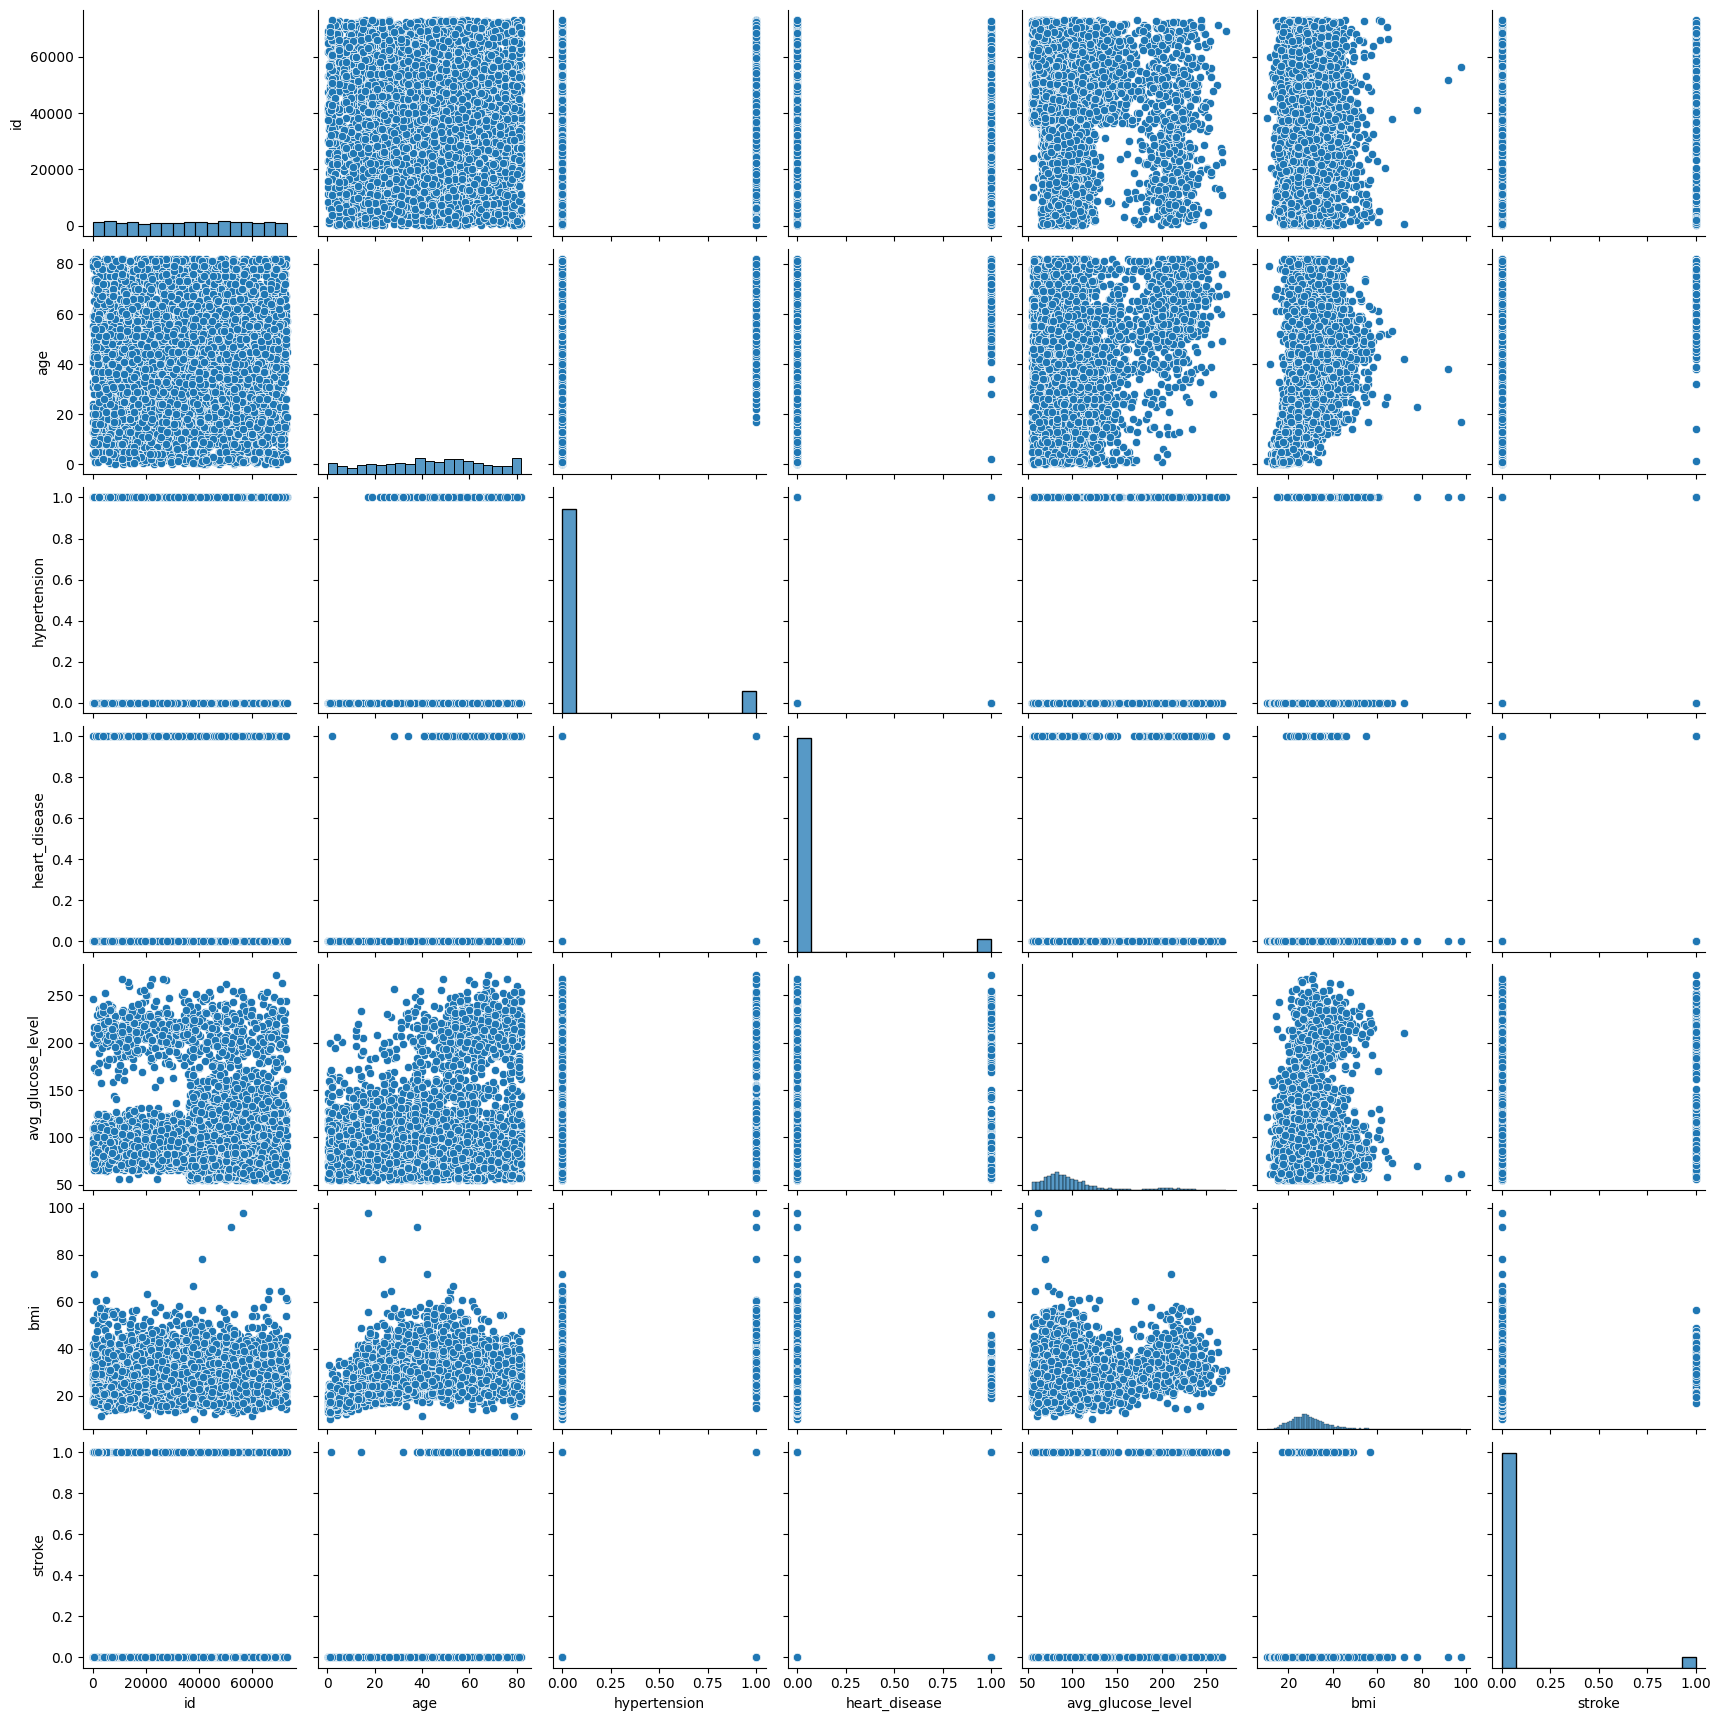

In [ ]:
# Visualisasi distribusi variabel-variabel numerik
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(data[numeric_features])
plt.show()

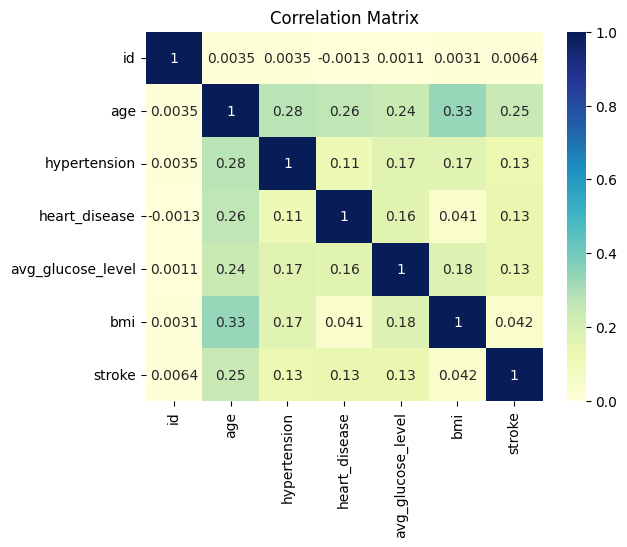

In [ ]:
# Visualisasi korelasi antar variabel numerik
correlation_matrix = data[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

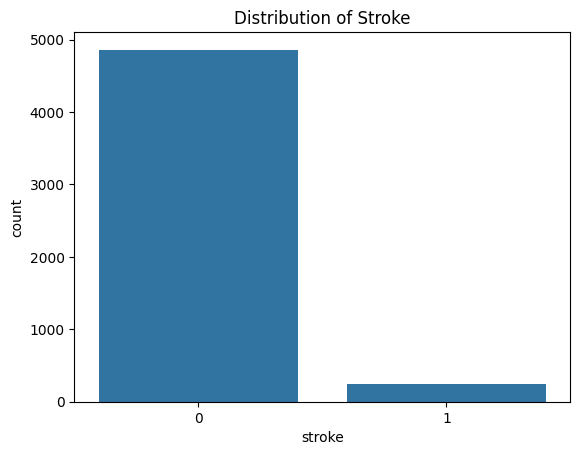

In [ ]:
# Visualisasi distribusi variabel target
sns.countplot(x='stroke', data=data)
plt.title("Distribution of Stroke")
plt.show()




Setelah melakukan eksplorasi data, maka dapat melanjutkan dengan pemrosesan data dan membagi dataset menjadi data pelatihan dan data pengujian.

Langkah selanjutnya adalah melakukan pemrosesan data, seperti mengatasi nilai yang hilang, menangani fitur kategorikal, dan membagi dataset menjadi data pelatihan dan data pengujian.

In [ ]:
# Mengatasi nilai yang hilang
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [ ]:
# Mengatasi fitur kategorikal
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [ ]:
# Memisahkan fitur dan target
X = data.drop(columns=['stroke'])
y = data['stroke']

In [ ]:
# Memisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Setelah pemrosesan data, maka dilakukan untuk model dengan algoritma Decision Tree

 Setelah itu, dilanjutkan dengan model Random Forest dan membandingkan performanya dengan Decision Tree.

In [ ]:
# Membuat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Melakukan prediksi pada data pengujian
dt_predictions = dt_model.predict(X_test_scaled)

In [ ]:
# Evaluasi model Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, dt_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

Decision Tree Accuracy: 0.9148727984344422

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.18      0.11      0.14        62

    accuracy                           0.91      1022
   macro avg       0.56      0.54      0.55      1022
weighted avg       0.90      0.91      0.91      1022


Confusion Matrix:
[[928  32]
 [ 55   7]]


In [ ]:
# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Melakukan prediksi pada data pengujian
rf_predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Evaluasi model Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))



Random Forest Accuracy: 0.9393346379647749

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
[[960   0]
 [ 62   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Setelah mengevaluasi kedua model, maka dapat membandingkan model keduanya dan memilih model terbaik. Namun, juga dapat melakukan penyetelan hyperparameter untuk meningkatkan nilai model.

Langkah selanjutnya dengan melakukan penyetelan hyperparameter untuk model Decision Tree dan Random Forest menggunakan GridSearchCV untuk mencari kombinasi hyperparameter yang optimal.

In [ ]:
# Hyperparameter tuning untuk Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=3, scoring='accuracy')
dt_grid_search.fit(X_train_scaled, y_train)

print("Best Parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best Score for Decision Tree:", dt_grid_search.best_score_)

# Hyperparameter tuning untuk Random Forest
rf_param_grid = {
    # 'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)

print("\nBest Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Score for Random Forest:", rf_grid_search.best_score_)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score for Decision Tree: 0.9503431181900224

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Random Forest: 0.954256414455315


Setelah menemukan kombinasi hyperparameter terbaik untuk masing-masing model, maka dapat melatih ulang model dengan hyperparameter yang dioptimalkan dan mengevaluasi performanya kembali.

Selanjutnya, akan dilakukan untuk model Decision Tree dan Random Forest dengan menggunakan kombinasi hyperparameter terbaik yang telah ditemukan, kemudian akan melakukan evaluasi kembali terhadap keduanya.

In [ ]:
# Menggunakan kombinasi hyperparameter terbaik untuk Decision Tree
best_dt_model = DecisionTreeClassifier(**dt_grid_search.best_params_)
best_dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

In [ ]:
# Melakukan prediksi pada data pengujian
best_dt_predictions = best_dt_model.predict(X_test_scaled)

In [ ]:
# Evaluasi model Decision Tree yang telah dioptimalkan
best_dt_accuracy = accuracy_score(y_test, best_dt_predictions)
print("Optimized Decision Tree Accuracy:", best_dt_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, best_dt_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, best_dt_predictions))

Optimized Decision Tree Accuracy: 0.9373776908023483

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.51      1022
weighted avg       0.90      0.94      0.91      1022


Confusion Matrix:
[[956   4]
 [ 60   2]]


In [ ]:
# Menggunakan kombinasi hyperparameter terbaik untuk Random Forest
best_rf_model = RandomForestClassifier(**rf_grid_search.best_params_)
best_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
# Melakukan prediksi pada data pengujian
best_rf_predictions = best_rf_model.predict(X_test_scaled)

In [ ]:
# Evaluasi model Random Forest yang telah dioptimalkan
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
print("\nOptimized Random Forest Accuracy:", best_rf_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, best_rf_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, best_rf_predictions))


Optimized Random Forest Accuracy: 0.9393346379647749

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
[[960   0]
 [ 62   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Setelah melatih ulang model dengan hyperparameter yang dioptimalkan, maka dapat dilihat apakah performa model telah meningkat. Evaluasi performa model dapat memberikan pemahaman yang lebih baik tentang kemampuan model dalam melakukan prediksi stroke. Terakhir, dapat memilih model terbaik berdasarkan matriks evaluasi yang telah digunakan.